### 회귀분석(보험료 예측)
- https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.csv/1

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.corr()['charges'].sort_values()

ValueError: could not convert string to float: 'female'

In [5]:
data2 = pd.read_csv('Data/insurance2.csv')
data2.head()

,age,sex,bmi,children,smoker,southwest,southeast,northeast,northwest,charges
0,19,0,27.900,0,1,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,1,0,0,1725.55230
2,28,1,33.000,3,0,0,1,0,0,4449.46200
3,33,1,22.705,0,0,0,0,0,1,21984.47061
4,32,1,28.880,0,0,0,0,0,1,3866.85520


In [6]:
data2.corr()['charges'].sort_values()   # smoker가 보험료와 상관관계가 높음

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [7]:
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'southeast',
       'northeast', 'northwest', 'charges'],
      dtype='object')

In [9]:
x = data2[data2.columns[:-1]]
y = data2['charges']

import statsmodels.api as sm
model = sm.OLS(y, x)
result = model.fit()
result.summary()     # age가 1살 많을 경우 256만큼 보험료 비쌈, sex가 1인 경우(male) 보험료가 더 싸짐. 0인 경우(female) 더 비쌈.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:05:52   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex         -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
southwest   -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
southeast  -1.297e+04   1079.158    -12.022      0.000   -1.51e+04   -1.09e+04
northeast  -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
northwest  -1.229e+04    988.196    -12.438      0.000   -1.42e+04   -1.04e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

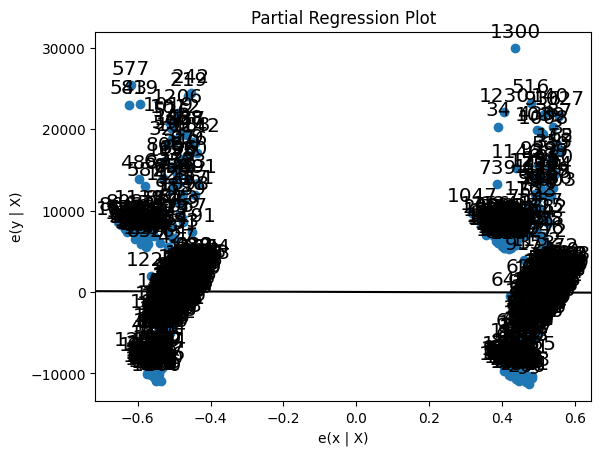

In [21]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt
# obs_labels : 데이터 라벨링 여부
plot_partregress("charges", "sex", x, data=data2, obs_labels=True)
plt.show()

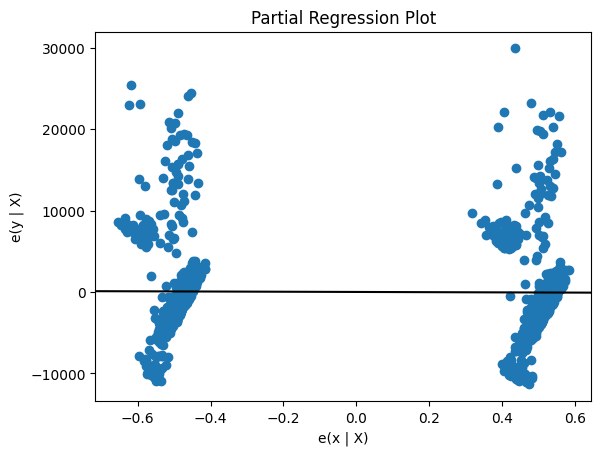

In [22]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt
# obs_labels : 데이터 라벨링 여부
plot_partregress("charges", "sex", x, data=data2, obs_labels=False)
plt.show()

In [10]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'southeast',
       'northeast', 'northwest'],
      dtype='object')

In [19]:
# p-value높은 age 제거
x = x[['age','bmi', 'children', 'smoker', 'southwest', 'southeast',
       'northeast', 'northwest']]
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:08:29   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.9736     11.891     21.610      0.000     233.646     280.301
bmi          338.6646     28.559     11.858      0.000     282.639     394.690
children     474.5665    137.740      3.445      0.001     204.355     744.778
smoker      2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
southwest  -1.295e+04   1012.403    -12.791      0.000   -1.49e+04    -1.1e+04
southeast  -1.302e+04   1071.021    -12.161      0.000   -1.51e+04   -1.09e+04
northeast  -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
northwest  -1.234e+04    979.405    -12.602      0.000   -1.43e+04   -1.04e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

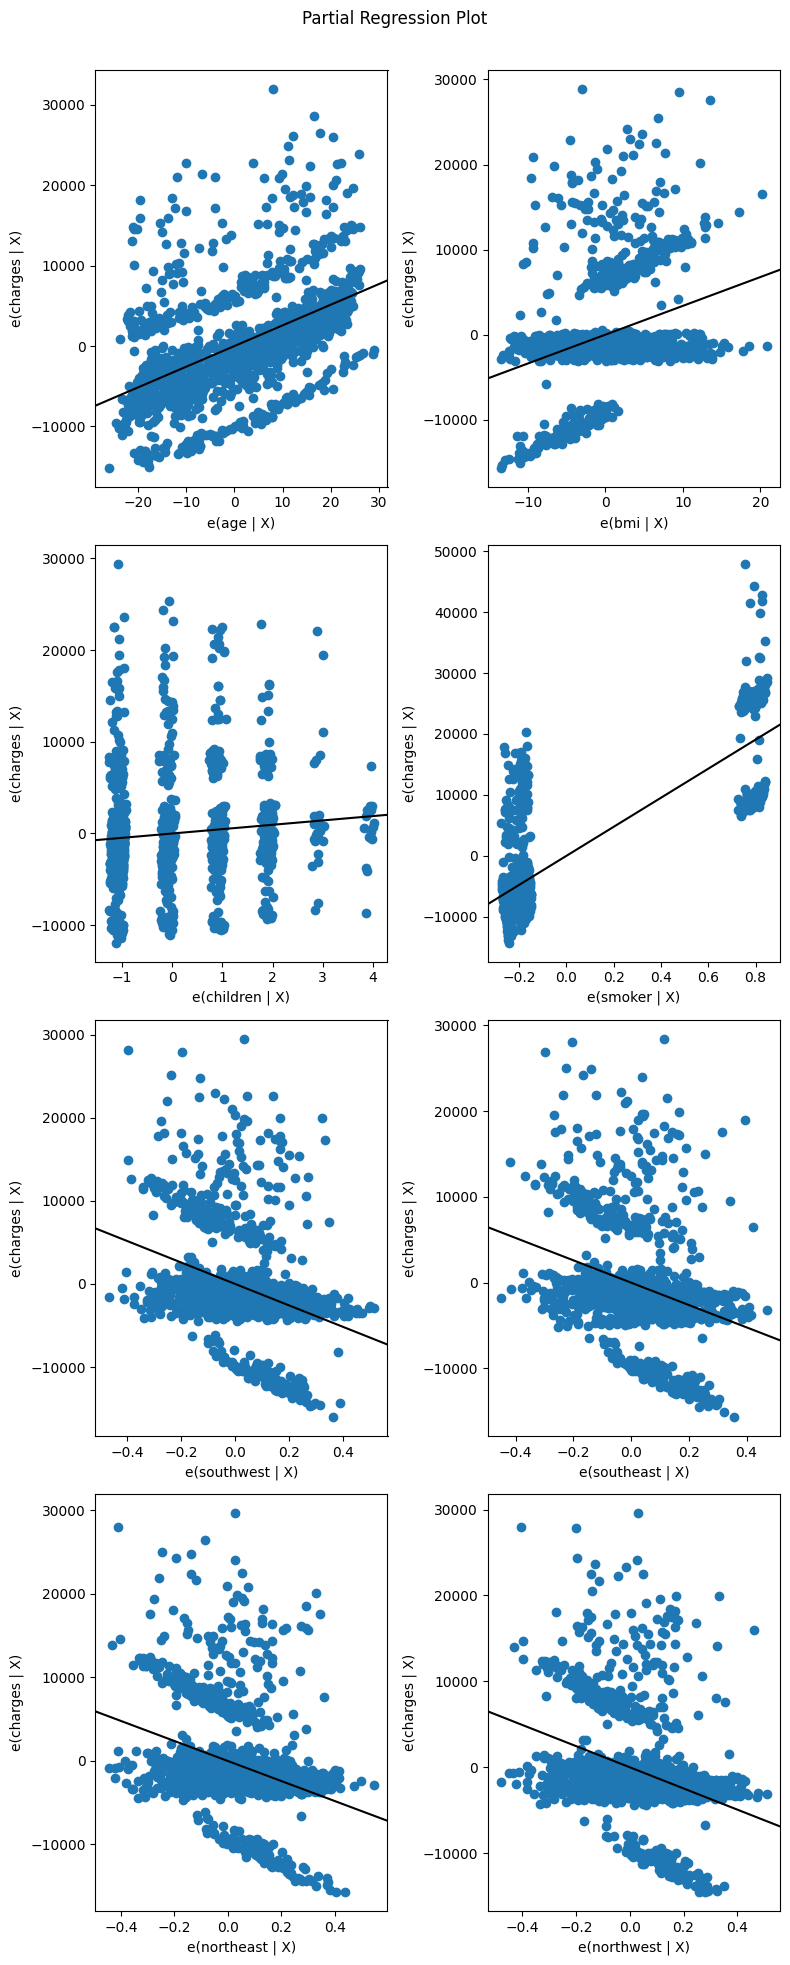

In [23]:
# 전체 데이터에 대해 한번에 부분회귀 플롯을 그리는 함수
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 20))
# result: 학습 완료된 모형
plot_partregress_grid(result, fig=fig)
plt.plot()